In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import json

In [2]:
dataset = pd.read_csv("/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/datasetRawAdded2.csv", usecols =['Date_UTC','entry_id', 'PM1','PM25', 'PM10', 'CO', 'Temp', 'Humidity', 'Pressure', 'MAXT','MINT','SPD','WDG','CLD'])
df = pd.DataFrame(dataset)

In [3]:
df.columns = ['Date_UTC','entry_id', 'PM1','PM25', 'PM10', 'CO', 'Temp', 'Humidity', 'Pressure', 'MAXT','MINT','SPD','WDG','CLD']

In [4]:
# print("Replacing blanks with NaN:\n")
df = df.replace(r'^\s*$', np.NaN, regex=True)
df[['PM1','PM25', 'PM10', 'CO', 'Temp', 'Humidity', 'Pressure','MAXT','MINT','SPD','WDG','CLD']] = df[['PM1','PM25', 'PM10', 'CO', 'Temp', 'Humidity', 'Pressure','MAXT','MINT','SPD','WDG','CLD']].apply(pd.to_numeric) 

In [5]:
df.head()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD
0,10/07/15,0,NaN,45.0,106.0,11.0,25.585000,76.833333,1006.791667,26.51,24.51,2.40,270.00,35.00
1,11/07/15,1,NaN,48.0,137.0,7.0,25.710833,74.291667,1007.333333,26.35,24.57,2.13,272.50,47.92
2,12/07/15,2,NaN,59.0,101.0,10.0,26.253333,71.291667,1009.041667,27.04,25.06,2.37,262.46,50.33
3,13/07/15,3,NaN,57.0,155.0,11.0,26.346250,72.541667,1009.250000,27.18,25.03,1.88,266.38,36.38
4,14/07/15,4,NaN,58.0,154.0,14.0,26.554167,72.208333,1007.833333,27.32,25.45,2.00,271.67,30.00


### Getting values from Hardware Sensors through ThingSpeak API

In [6]:
from urllib.request import urlopen
import csv
url = "https://api.thingspeak.com/channels/987334/feeds/last.json?api_key=88BMJAAFH25HIF9X"

json_url = urlopen(url)
json_data = json.loads(json_url.read())
# print (json_data)
# json_data2 = json_data

vals = json_data.values()
# print (vals)
tempPM1 = (list(vals)[2])
# tempPM25 = (list(vals)[3])

tempPM25 = 45

tempPM10 = (list(vals)[4])
tempCO = (list(vals)[5])
tempTemp = (list(vals)[6])
tempHum = (list(vals)[7])
tempPress = (list(vals)[8])

# print ("\n",json_data['created_at'])
tempCreated = json_data['created_at']

import datetime
def convertDate(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%SZ")
     return new_date.date() # you can change the ".date()" to ".year", ".month", ".day" etc...

convertDate(tempCreated)

x = convertDate(tempCreated)
tempDate = x.strftime("%d/%m/%y")
# print(tempDate)

In [7]:
count = len(df)
print ("Number of records in dataset: ",count)

df.tail()

Number of records in dataset:  1741


,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD
1736,10/04/20,1736,NaN,57.0,59.0,42.0,30.697917,27.125000,1011.291667,31.09,29.83,2.84,173.38,17.00
1737,11/04/20,1737,NaN,60.0,58.0,43.0,31.407917,25.083333,1012.166667,31.75,30.67,2.70,197.46,12.25
1738,12/04/20,1738,NaN,58.0,55.0,43.0,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63
1739,13/04/20,1739,NaN,56.0,58.0,42.0,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88
1740,14/04/20,1740,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88


In [8]:
df.at[count, 'entry_id'] = count
df.at[count,'PM1'] = tempPM1
df.at[count,'PM25'] = tempPM25
df.at[count,'PM10'] = tempPM10
df.at[count,'CO'] = tempCO
df.at[count,'Temp'] = tempTemp
df.at[count,'Humidity'] = tempHum
df.at[count,'Pressure'] = tempPress
df.at[count,'Date_UTC'] = tempDate


df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD
1737,11/04/20,1737.0,NaN,60.0,58.0,43.00,31.407917,25.083333,1012.166667,31.75,30.67,2.70,197.46,12.25
1738,12/04/20,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63
1739,13/04/20,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88
1740,14/04/20,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88
1741,18/05/20,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN


### Getting predicted weather conditions from OpenWeather API

In [9]:
import json
import requests

url = "http://api.openweathermap.org/data/2.5/forecast?id=1259229&appid=c2b23a89894073eba086b32a56afca57&units=metric"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

# print(response.text.encode('utf8'))
todos = json.loads(response.text)

tempSum = 0
humiSum = 0
pressSum = 0
for i in range(8,16):
    tempSum = tempSum + (todos["list"][i]['main']['temp'])
    humiSum = humiSum + (todos["list"][i]['main']['humidity'])
    pressSum = pressSum + (todos["list"][i]['main']['pressure'])



avgTemp = tempSum / 8
avgHumi = humiSum / 8
avgPress = pressSum / 8


print("Avg Temp:", avgTemp)
print("Avg Humidity:", avgHumi)
print("Avg Pressure:", avgPress)

Avg Temp: 29.581249999999997
Avg Humidity: 59.75
Avg Pressure: 1007.875


In [10]:
count = len(df)
print ("Number of records in dataset: ",count)

Number of records in dataset:  1742


In [11]:
from datetime import timedelta

def convertDate(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%SZ")
     return new_date.date() # you can change the ".date()" to ".year", ".month", ".day" etc...

convertDate(tempCreated)
x = convertDate(tempCreated)
x += timedelta(days=1)

tempNewDate = x.strftime("%d/%m/%y")
print(tempNewDate)

19/05/20


In [12]:
df.at[count, 'entry_id'] = count
# df.at[count,'PM1'] = tempPM1
df.at[count,'PM25'] = 0
# df.at[count,'PM10'] = tempPM10
# df.at[count,'CO'] = tempCO
df.at[count,'Temp'] = avgTemp
df.at[count,'Humidity'] = avgHumi
df.at[count,'Pressure'] = avgPress
df.at[count,'Date_UTC'] = tempNewDate

In [13]:
df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD
1738,12/04/20,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63
1739,13/04/20,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88
1740,14/04/20,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88
1741,18/05/20,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN
1742,19/05/20,1742.0,NaN,0.0,NaN,NaN,29.581250,59.750000,1007.875000,NaN,NaN,NaN,NaN,NaN


In [14]:
df.to_csv(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/datasetRawAdded2.csv", columns = ["Date_UTC","entry_id","PM1","PM25","PM10","CO","Temp","Humidity","Pressure","MAXT","MINT","SPD","WDG","CLD"])

In [15]:
df['Date_UTC'] = pd.to_datetime(df['Date_UTC'], format="%d/%m/%y")
# print ("Converting Date_UTC string to datetime: ", df.dtypes)
df.index = df["Date_UTC"]

In [16]:
count = len(df)
print ("Number of records in dataset: ",count)
#print(df.head())

Number of records in dataset:  1743


In [17]:
df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD
Date_UTC,,,,,,,,,,,,,,
2020-04-12,2020-04-12,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63
2020-04-13,2020-04-13,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88
2020-04-14,2020-04-14,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88
2020-05-18,2020-05-18,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN
2020-05-19,2020-05-19,1742.0,NaN,0.0,NaN,NaN,29.581250,59.750000,1007.875000,NaN,NaN,NaN,NaN,NaN


In [18]:
# df.Date_UTC.max() - df.Date_UTC.min()

#------- Since COVID-19 Lockdown -------#
# ts = pd.to_datetime('25/3/2020', format='%d/%m/%Y')
# print ("COVID-19 Lockdown since: ",ts)
# df.loc[df.Date_UTC >= ts, :].head()

# df.Date_UTC.dt.month.head()

In [19]:
df["day_week"] = df["Date_UTC"].dt.day_name()

In [20]:
# df.head(15)

In [21]:
df['day_week_cat'] = df.day_week.astype("category").cat.codes
# df.head(15)

In [22]:
df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD,day_week,day_week_cat
Date_UTC,,,,,,,,,,,,,,,,
2020-04-12,2020-04-12,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63,Sunday,3
2020-04-13,2020-04-13,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88,Monday,1
2020-04-14,2020-04-14,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88,Tuesday,5
2020-05-18,2020-05-18,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN,Monday,1
2020-05-19,2020-05-19,1742.0,NaN,0.0,NaN,NaN,29.581250,59.750000,1007.875000,NaN,NaN,NaN,NaN,NaN,Tuesday,5


In [23]:
df['month'] = df["Date_UTC"].dt.month
# df.head(20)

In [24]:
# df = df[df['PM25'] <= 250]
df.shape

(1743, 17)

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

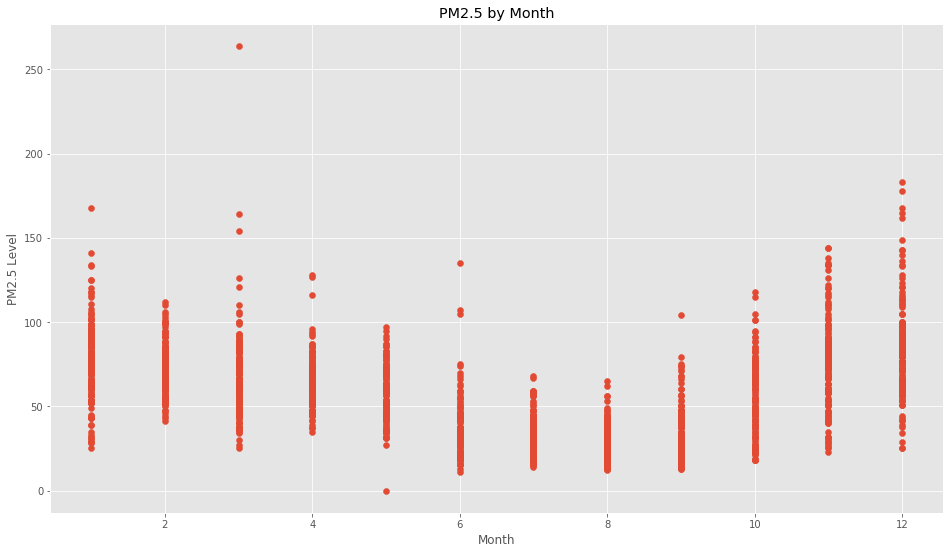

In [26]:
x = df['month']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

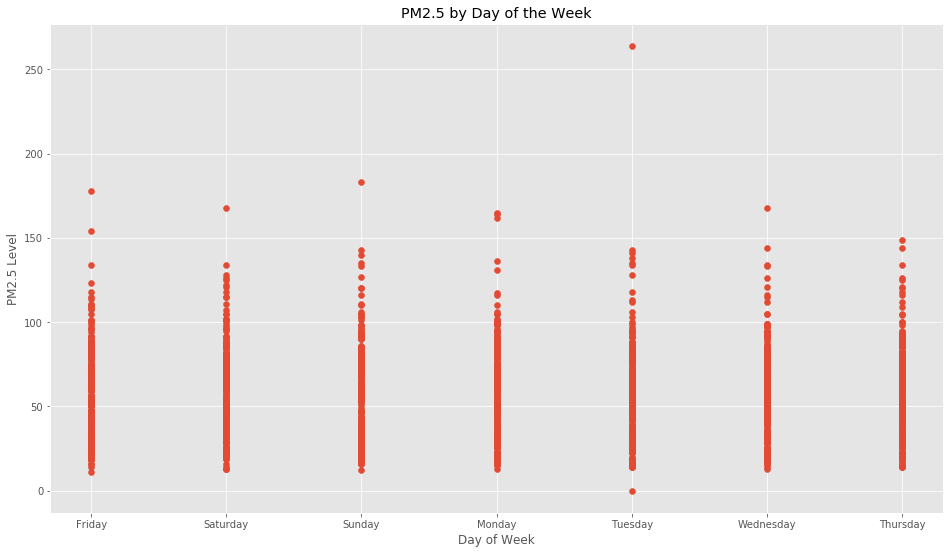

In [27]:
#df = df[int(df['PM2.5']) <= 220]

x = df['day_week']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Day of Week')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Day of the Week')
plt.show()

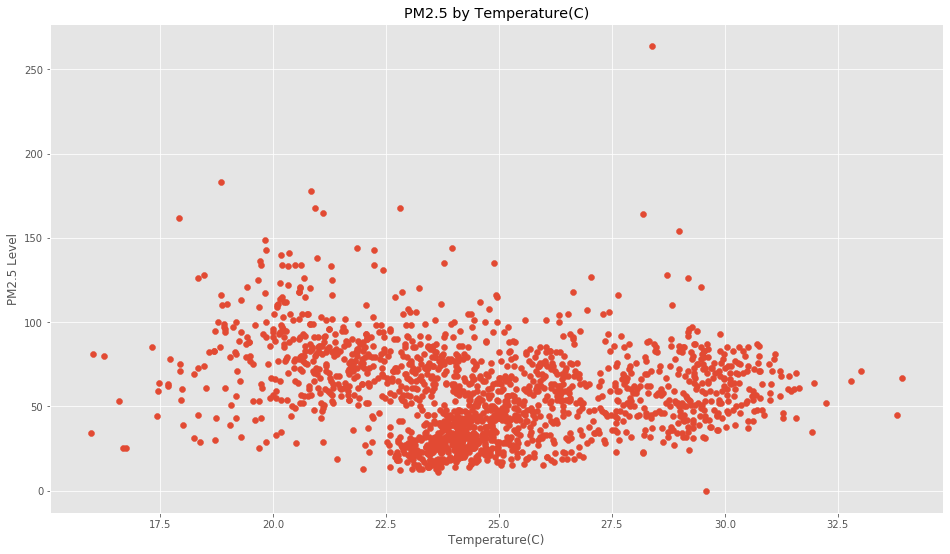

In [28]:
x = df['Temp']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Temperature(C)')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature(C)')
plt.show()

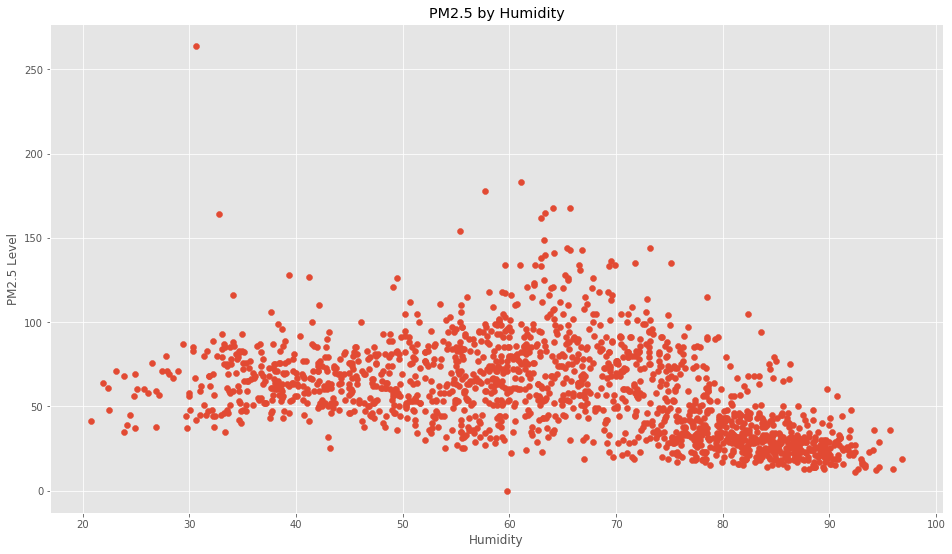

In [29]:
x = df['Humidity']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Humidity')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Humidity')
plt.show()

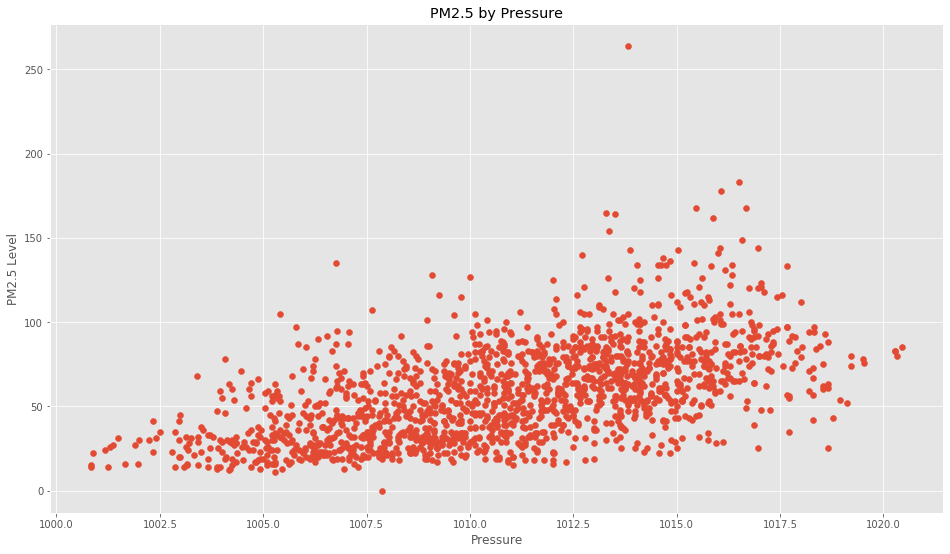

In [30]:
x = df['Pressure']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Pressure')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Pressure')
plt.show()

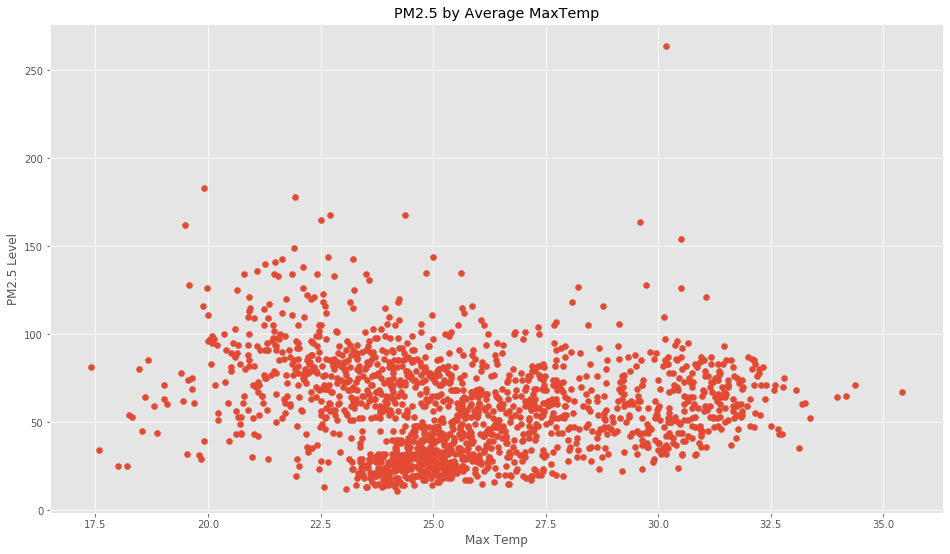

In [31]:
x = df['MAXT']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Max Temp')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Average MaxTemp')
plt.show()

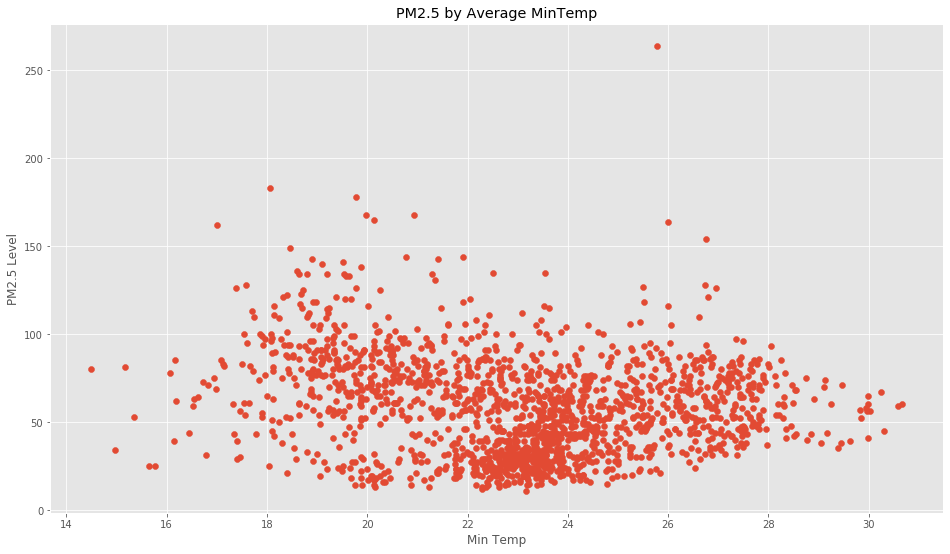

In [32]:
x = df['MINT']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Min Temp')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Average MinTemp')
plt.show()

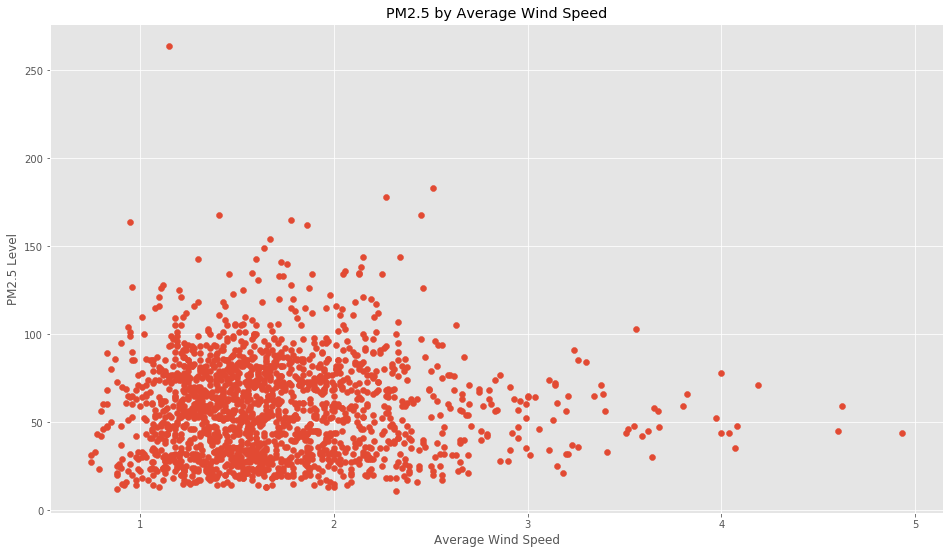

In [33]:
x = df['SPD']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Average Wind Speed')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Average Wind Speed')
plt.show()

In [34]:
# x = df['WDG']
# y = df['PM25']
# plt.scatter(x,y)
# plt.xlabel('Wind Direction')
# plt.ylabel('PM2.5 Level')
# plt.title('PM2.5 by Wind Degree')
# plt.show()

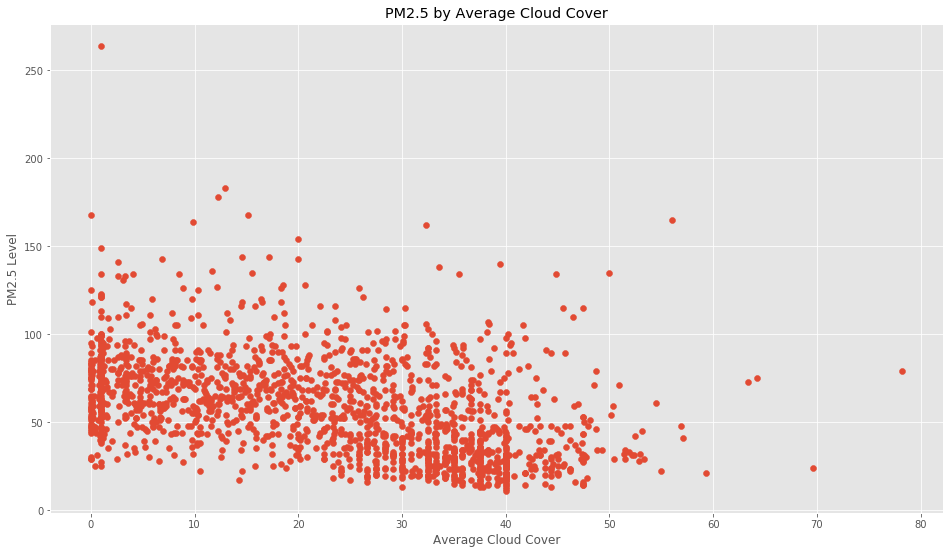

In [35]:
x = df['CLD']
y = df['PM25']
plt.scatter(x,y)
plt.xlabel('Average Cloud Cover')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Average Cloud Cover')
plt.show()

In [36]:
df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD,day_week,day_week_cat,month
Date_UTC,,,,,,,,,,,,,,,,,
2020-04-12,2020-04-12,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63,Sunday,3,4
2020-04-13,2020-04-13,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88,Monday,1,4
2020-04-14,2020-04-14,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88,Tuesday,5,4
2020-05-18,2020-05-18,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN,Monday,1,5
2020-05-19,2020-05-19,1742.0,NaN,0.0,NaN,NaN,29.581250,59.750000,1007.875000,NaN,NaN,NaN,NaN,NaN,Tuesday,5,5


In [37]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df['PM25']))
# print (z)

There seems to be a outlier in the dataset, which happens to occur in the month of March of some year. Thus, we further analyze this using a time_series graph in the next section, where we handle the ouliers in the dataset.

# Handling Outliers

Let's handle theoutlier points in the PM25 feature. First lets take a look at the date range from the graph above.

In [38]:
def time_series(start, end):
    time_series_df = df[['Date_UTC', 'PM25']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
    x = time_series_df.Date_UTC
    y = time_series_df.PM25
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

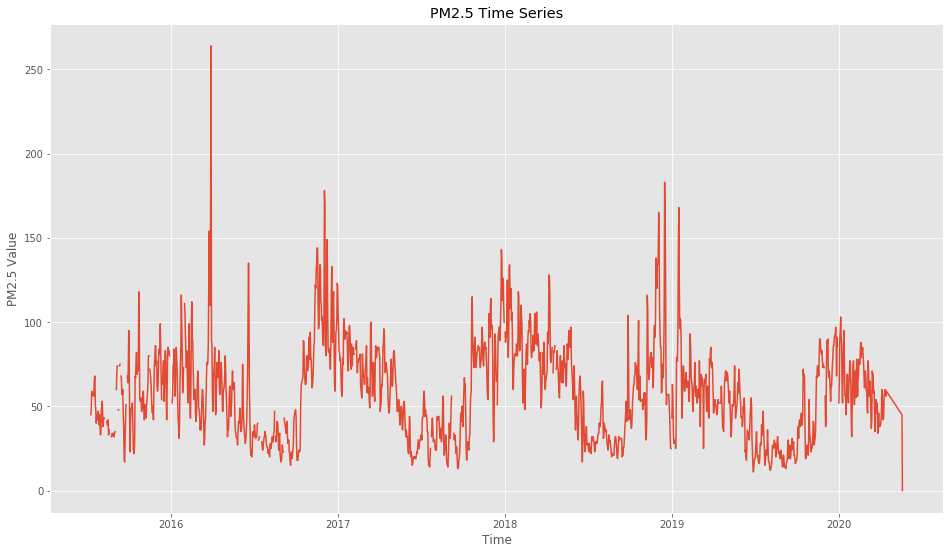

In [39]:
# time_series('2017','2017-05')
time_series('2015','2021')

There seems to be a unforeseen spike around the early stages of 2016. Let's further look into it.

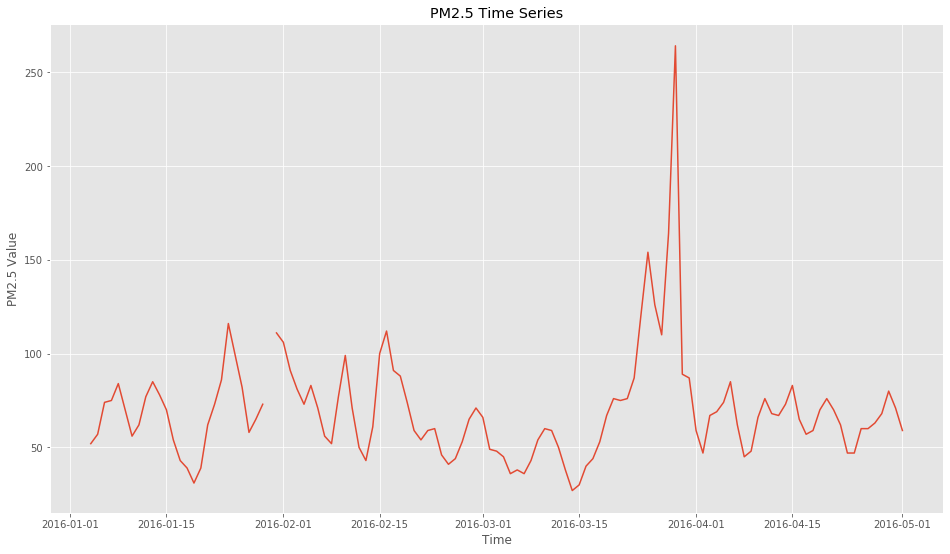

In [40]:
time_series('2016','2016-05')
# time_series('2018','2018-05')
# time_series('2019','2019-05')
# time_series('2020','2020-05')

In [41]:
df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD,day_week,day_week_cat,month
Date_UTC,,,,,,,,,,,,,,,,,
2020-04-12,2020-04-12,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63,Sunday,3,4
2020-04-13,2020-04-13,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88,Monday,1,4
2020-04-14,2020-04-14,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88,Tuesday,5,4
2020-05-18,2020-05-18,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN,Monday,1,5
2020-05-19,2020-05-19,1742.0,NaN,0.0,NaN,NaN,29.581250,59.750000,1007.875000,NaN,NaN,NaN,NaN,NaN,Tuesday,5,5


After exploring the spikes throughout the dataset, we see that there is only one which exceeds 200. We know from external reports that pollution is actually getting worse year over year. This leads to the conclusion that these points are possible in error and should be removed.

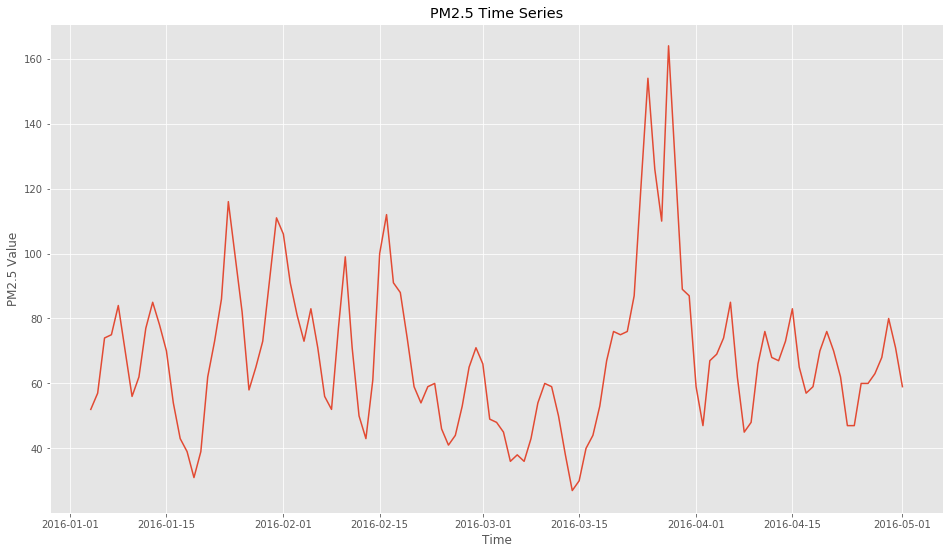

In [42]:
df = df[df['PM25'] <= 220]
time_series ('2016', '2016-05')

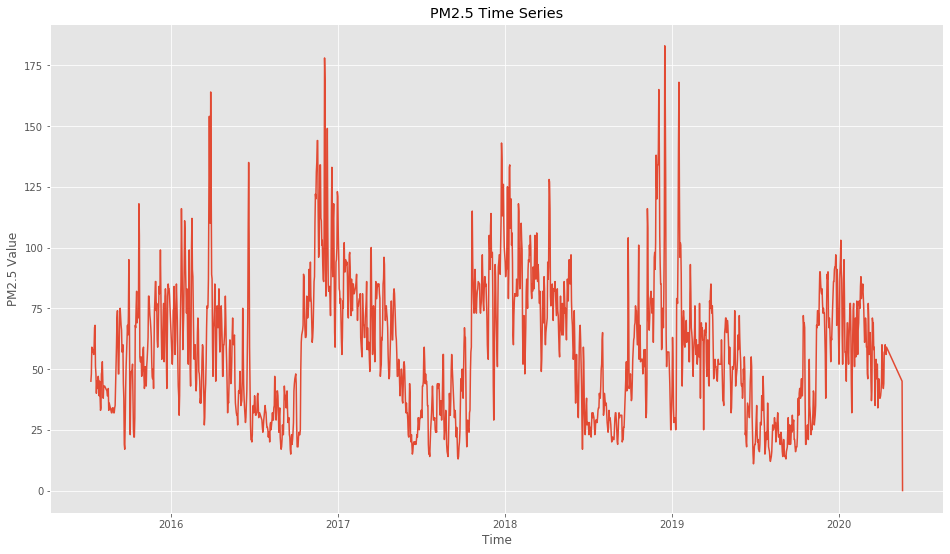

In [43]:
time_series('2015', '2021')

In [44]:
df.isnull().any()
# df.dropna()

Date_UTC        False
entry_id        False
PM1              True
PM25            False
PM10             True
CO               True
Temp            False
Humidity        False
Pressure        False
MAXT             True
MINT             True
SPD              True
WDG              True
CLD              True
day_week        False
day_week_cat    False
month           False
dtype: bool

In [45]:
df.describe()

,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD,day_week_cat,month
count,1691.000000,1.0,1691.000000,1662.000000,1413.000000,1691.000000,1691.000000,1691.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1691.000000,1691.000000
mean,883.126552,27.0,57.905381,61.115523,42.058733,24.616472,64.564381,1010.979764,25.676211,23.061533,1.704831,206.034239,22.357845,3.001774,6.535186
std,500.083465,NaN,27.491719,28.452055,54.014377,3.046162,17.153027,3.791132,3.043216,2.782552,0.537377,73.035171,14.680312,2.012240,3.517215
min,0.000000,27.0,0.000000,8.000000,2.000000,15.976250,20.750000,1000.833333,17.400000,14.490000,0.750000,42.500000,0.000000,0.000000,1.000000
25%,453.500000,27.0,35.000000,36.000000,25.000000,22.866250,52.104167,1008.166667,23.770000,21.140000,1.330000,143.330000,8.880000,1.000000,3.000000
50%,889.000000,27.0,56.000000,63.000000,38.000000,24.263750,65.541667,1011.166667,25.130000,23.160000,1.610000,234.790000,23.670000,3.000000,7.000000
75%,1316.500000,27.0,76.000000,82.000000,51.000000,26.395000,78.979167,1013.875000,27.450000,24.820000,1.960000,269.920000,35.000000,5.000000,10.000000
max,1742.000000,27.0,183.000000,264.000000,1462.000000,33.925417,96.833333,1020.458333,35.420000,30.670000,4.930000,322.170000,78.250000,6.000000,12.000000


In [46]:
df.tail()

,Date_UTC,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD,day_week,day_week_cat,month
Date_UTC,,,,,,,,,,,,,,,,,
2020-04-12,2020-04-12,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63,Sunday,3,4
2020-04-13,2020-04-13,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88,Monday,1,4
2020-04-14,2020-04-14,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88,Tuesday,5,4
2020-05-18,2020-05-18,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN,Monday,1,5
2020-05-19,2020-05-19,1742.0,NaN,0.0,NaN,NaN,29.581250,59.750000,1007.875000,NaN,NaN,NaN,NaN,NaN,Tuesday,5,5


In [47]:
# def time_series(start, end):
#     time_series_df = df[['Date_UTC', 'Pressure']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
#     x = time_series_df.Date_UTC
#     y = time_series_df.Pressure
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('Pressure')
#     plt.title('Pressure Time Series')
#     return plt.show();

# time_series('2015','2021')

In [48]:
# def time_series(start, end):
#     time_series_df = df[['Date_UTC', 'SPD']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
#     x = time_series_df.Date_UTC
#     y = time_series_df.SPD
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('SPD')
#     plt.title('SPD Time Series')
#     return plt.show();

# time_series('2015','2021')

In [49]:
# def time_series(start, end):
#     time_series_df = df[['Date_UTC', 'Temp']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
#     x = time_series_df.Date_UTC
#     y = time_series_df.Temp
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('Temp')
#     plt.title('Temp Time Series')
#     return plt.show();

# time_series('2015','2021')

In [50]:
# def time_series(start, end):
#     time_series_df = df[['Date_UTC', 'CLD']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
#     x = time_series_df.Date_UTC
#     y = time_series_df.CLD
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('CLD')
#     plt.title('CLD Time Series')
#     return plt.show();

# time_series('2015','2021')

In [51]:
# def time_series(start, end):
#     time_series_df = df[['Date_UTC', 'Humidity']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
#     x = time_series_df.Date_UTC
#     y = time_series_df.Humidity
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('Humidity')
#     plt.title('Humidity Time Series')
#     return plt.show();

# time_series('2015','2021')

In [52]:
# def time_series(start, end):
#     time_series_df = df[['Date_UTC', 'WDG']][(df['Date_UTC'] >= start) & (df['Date_UTC'] <= end)]
#     x = time_series_df.Date_UTC
#     y = time_series_df.WDG
#     plt.plot(x,y)
#     plt.xlabel('Time')
#     plt.ylabel('WDG')
#     plt.title('WDG Time Series')
#     return plt.show();

# time_series('2015','2021')

In [53]:
# time_series('2015','2021')

# Random Analysis Code

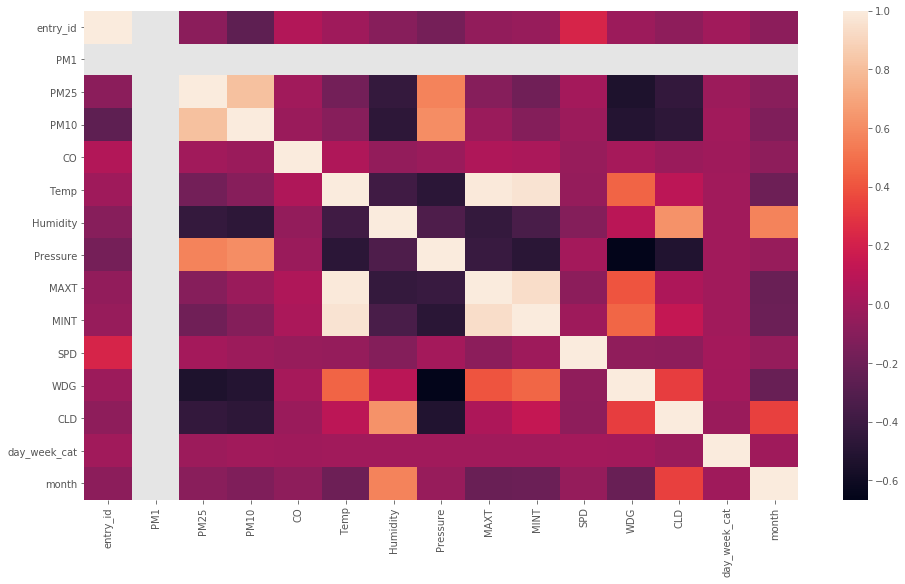

In [54]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [55]:
load = df[['PM25', 'month']].groupby(['month']).mean()

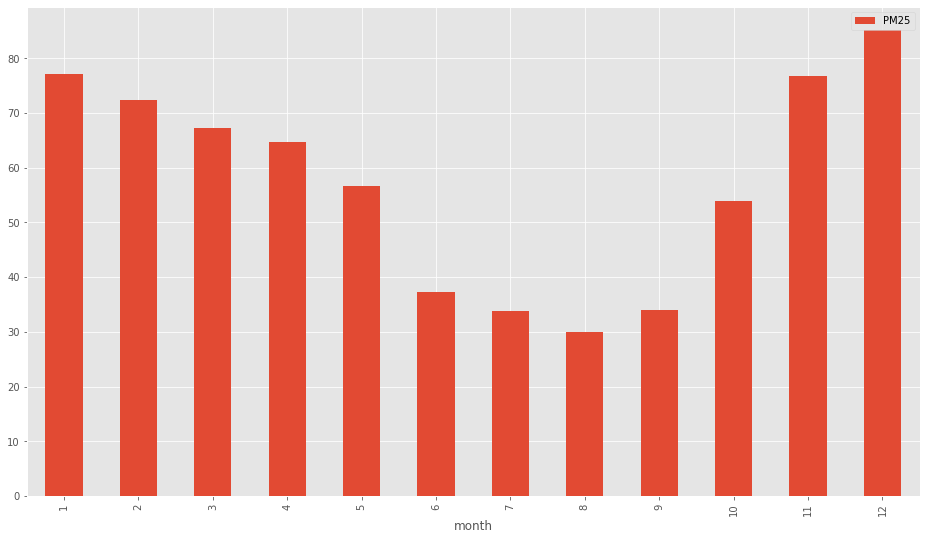

In [56]:
load.plot(kind='bar')

# Dropping Attributes

In [57]:
df = df.drop(['Date_UTC','entry_id','PM1','day_week','PM10','CO','WDG'], axis=1)

df.shape
# df.dropna()
# df.isnull.values().any()

df.shape

(1691, 10)

In [58]:
df = df.drop(['MAXT','MINT','SPD','CLD'], axis=1)
df.shape

(1691, 6)

PM25            float64
Temp            float64
Humidity        float64
Pressure        float64
day_week_cat       int8
month             int64
dtype: object

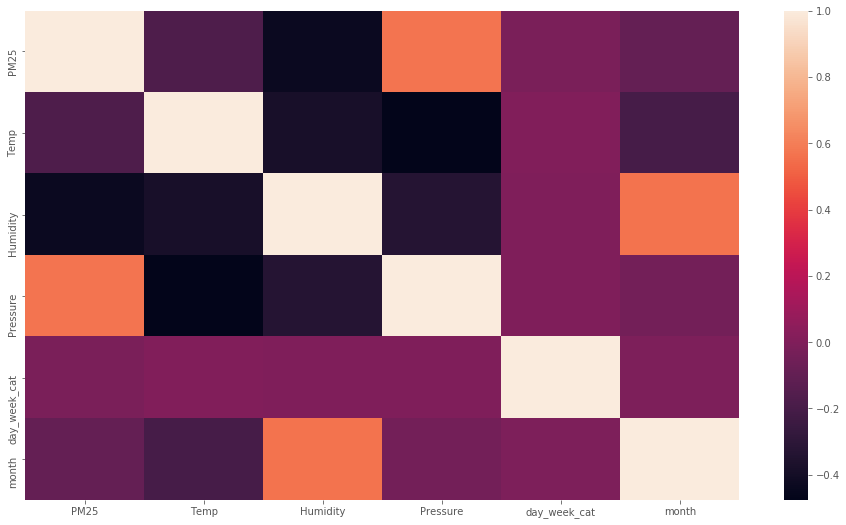

In [59]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
df.dropna(thresh=1)
df.shape
df.dtypes
# df.CO.isnull().any()

In [60]:
df.corr()

,PM25,Temp,Humidity,Pressure,day_week_cat,month
PM25,1.000000,-0.172553,-0.435206,0.569108,-0.020341,-0.091549
Temp,-0.172553,1.000000,-0.382674,-0.475930,0.002755,-0.200308
Humidity,-0.435206,-0.382674,1.000000,-0.327164,-0.000688,0.566748
Pressure,0.569108,-0.475930,-0.327164,1.000000,0.002593,-0.039843
day_week_cat,-0.020341,0.002755,-0.000688,0.002593,1.000000,-0.004649
month,-0.091549,-0.200308,0.566748,-0.039843,-0.004649,1.000000


In [61]:
df.tail()

,PM25,Temp,Humidity,Pressure,day_week_cat,month
Date_UTC,,,,,,
2020-04-12,58.0,30.998750,26.125000,1011.166667,3,4
2020-04-13,56.0,31.213333,29.916667,1009.916667,1,4
2020-04-14,59.0,31.462917,26.875000,1010.125000,5,4
2020-05-18,45.0,33.800000,31.000000,1003.000000,1,5
2020-05-19,0.0,29.581250,59.750000,1007.875000,5,5


# Testing previous periods

In [62]:
df['PM25_1'] = df.PM25.shift(periods=1)
df['Temp_1'] = df.Temp.shift(periods=1)
df['Pressure_1'] = df.Pressure.shift(periods=1)
df['Humidity_1'] = df.Humidity.shift(periods=1)

df['PM25_2'] = df.PM25.shift(periods=2)
df['Temp_2'] = df.Temp.shift(periods=2)
df['Pressure_2'] = df.Pressure.shift(periods=2)
df['Humidity_2'] = df.Humidity.shift(periods=2)

df['PM25_3'] = df.PM25.shift(periods=3)
df['Temp_3'] = df.Temp.shift(periods=3)
df['Pressure_3'] = df.Pressure.shift(periods=3)
df['Humidity_3'] = df.Humidity.shift(periods=3)


In [63]:
# df.head(20)

PM25            float64
Temp            float64
Humidity        float64
Pressure        float64
day_week_cat       int8
month             int64
PM25_1          float64
Temp_1          float64
Pressure_1      float64
Humidity_1      float64
PM25_2          float64
Temp_2          float64
Pressure_2      float64
Humidity_2      float64
PM25_3          float64
Temp_3          float64
Pressure_3      float64
Humidity_3      float64
dtype: object

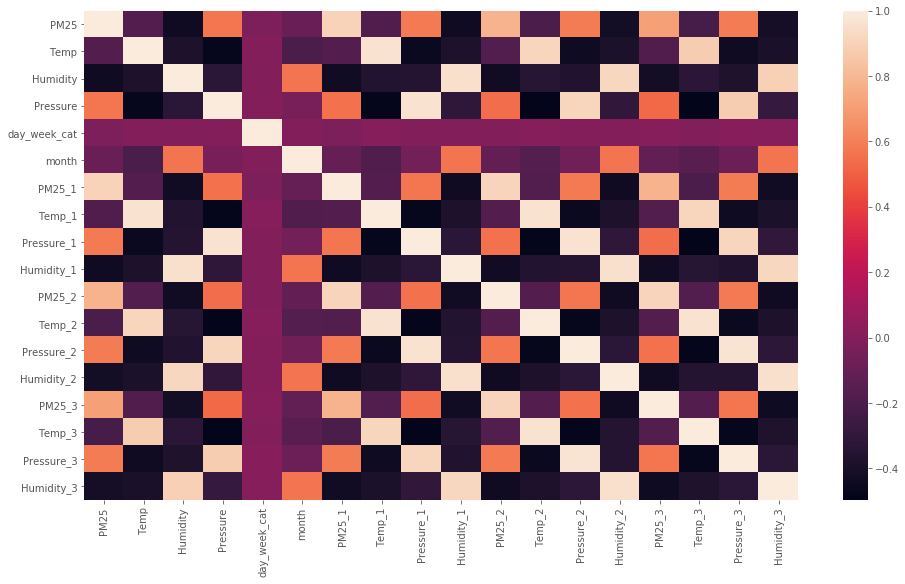

In [64]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
df.dropna(thresh=1)
df.shape
df.dtypes
# df.CO.isnull().any()

In [65]:
df.corr()

,PM25,Temp,Humidity,Pressure,day_week_cat,month,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3
PM25,1.000000,-0.172553,-0.435206,0.569108,-0.020341,-0.091549,0.906347,-0.181947,0.582420,-0.432054,0.781747,-0.202153,0.586700,-0.423752,0.709249,-0.220798,0.586546,-0.410038
Temp,-0.172553,1.000000,-0.382674,-0.475930,0.002755,-0.200308,-0.172676,0.963125,-0.456313,-0.383636,-0.178009,0.916880,-0.443202,-0.388148,-0.185427,0.879976,-0.434457,-0.393090
Humidity,-0.435206,-0.382674,1.000000,-0.327164,-0.000688,0.566748,-0.431457,-0.355941,-0.350495,0.956068,-0.426972,-0.338412,-0.364493,0.918910,-0.424387,-0.325378,-0.374362,0.891862
Pressure,0.569108,-0.475930,-0.327164,1.000000,0.002593,-0.039843,0.554218,-0.480607,0.963764,-0.312293,0.542469,-0.487542,0.913606,-0.298694,0.530504,-0.495940,0.880329,-0.284170
day_week_cat,-0.020341,0.002755,-0.000688,0.002593,1.000000,-0.004649,-0.020027,0.011063,-0.004776,-0.002180,-0.004176,0.008418,0.003098,0.004235,0.008386,0.000284,0.012835,0.007349
month,-0.091549,-0.200308,0.566748,-0.039843,-0.004649,1.000000,-0.100856,-0.183426,-0.053342,0.565831,-0.111268,-0.166289,-0.068073,0.567050,-0.119673,-0.146453,-0.081545,0.567127
PM25_1,0.906347,-0.172676,-0.431457,0.554218,-0.020027,-0.100856,1.000000,-0.170879,0.568948,-0.436139,0.907011,-0.178900,0.581320,-0.435561,0.782825,-0.199901,0.587197,-0.427673
Temp_1,-0.181947,0.963125,-0.355941,-0.480607,0.011063,-0.183426,-0.170879,1.000000,-0.475609,-0.382713,-0.172369,0.963570,-0.455236,-0.382482,-0.178186,0.916806,-0.443339,-0.386882
Pressure_1,0.582420,-0.456313,-0.350495,0.963764,-0.004776,-0.053342,0.568948,-0.475609,1.000000,-0.327372,0.554136,-0.480535,0.964200,-0.313661,0.542596,-0.487278,0.913692,-0.300254
Humidity_1,-0.432054,-0.383636,0.956068,-0.312293,-0.002180,0.565831,-0.436139,-0.382713,-0.327372,1.000000,-0.431574,-0.356410,-0.351314,0.956851,-0.426976,-0.338557,-0.364545,0.919887


# Visualizing Features

In [66]:
# import seaborn as sns
# g = sns.PairGrid(df, vars=["month", "PM25", "SPD", "Temp"], dropna=True)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);

In [67]:
# g = sns.FacetGrid(df, col='month', col_wrap=4)
# g.map(sns.distplot, "PM25")
# plt.show()

In [68]:
# g = sns.FacetGrid(df, col='month', col_wrap=4)
# g.map(plt.scatter, "Pressure","PM25")
# plt.show()

In [69]:
# g = sns.FacetGrid(df, col='month', col_wrap=4)
# g.map(plt.scatter, "Temp","PM25")
# plt.show()

In [70]:
# g = sns.FacetGrid(df, col='month', col_wrap=4)
# g.map(plt.scatter, "Temp","SPD")
# plt.show()

# Feature Engineering

In [71]:
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

# df.plot.scatter('month_sin','month_cos').set_aspect('equal')
# plt.show()

df = df.drop(['month'], axis=1)

In [72]:
df = df.iloc[3:]
df.head(10)

,PM25,Temp,Humidity,Pressure,day_week_cat,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3,month_sin,month_cos
Date_UTC,,,,,,,,,,,,,,,,,,,
2015-07-13,57.0,26.346250,72.541667,1009.250000,1,59.0,26.253333,1009.041667,71.291667,48.0,25.710833,1007.333333,74.291667,45.0,25.585000,1006.791667,76.833333,1.224647e-16,-1.0
2015-07-14,58.0,26.554167,72.208333,1007.833333,5,57.0,26.346250,1009.250000,72.541667,59.0,26.253333,1009.041667,71.291667,48.0,25.710833,1007.333333,74.291667,1.224647e-16,-1.0
2015-07-15,58.0,25.656667,73.708333,1006.583333,6,58.0,26.554167,1007.833333,72.208333,57.0,26.346250,1009.250000,72.541667,59.0,26.253333,1009.041667,71.291667,1.224647e-16,-1.0
2015-07-16,56.0,25.328333,78.125000,1004.708333,4,58.0,25.656667,1006.583333,73.708333,58.0,26.554167,1007.833333,72.208333,57.0,26.346250,1009.250000,72.541667,1.224647e-16,-1.0
2015-07-17,59.0,25.669583,76.708333,1005.125000,0,56.0,25.328333,1004.708333,78.125000,58.0,25.656667,1006.583333,73.708333,58.0,26.554167,1007.833333,72.208333,1.224647e-16,-1.0
2015-07-18,67.0,25.022083,81.333333,1006.875000,2,59.0,25.669583,1005.125000,76.708333,56.0,25.328333,1004.708333,78.125000,58.0,25.656667,1006.583333,73.708333,1.224647e-16,-1.0
2015-07-19,68.0,24.573750,83.416667,1007.416667,3,67.0,25.022083,1006.875000,81.333333,59.0,25.669583,1005.125000,76.708333,56.0,25.328333,1004.708333,78.125000,1.224647e-16,-1.0
2015-07-20,51.0,24.333333,83.583333,1006.291667,1,68.0,24.573750,1007.416667,83.416667,67.0,25.022083,1006.875000,81.333333,59.0,25.669583,1005.125000,76.708333,1.224647e-16,-1.0
2015-07-21,48.0,23.695000,92.000000,1006.750000,5,51.0,24.333333,1006.291667,83.583333,68.0,24.573750,1007.416667,83.416667,67.0,25.022083,1006.875000,81.333333,1.224647e-16,-1.0


# Create Final Dataset

In [73]:
df.to_csv(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/clairityCleanedAdded2.csv")

In [74]:
df.tail()

,PM25,Temp,Humidity,Pressure,day_week_cat,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3,month_sin,month_cos
Date_UTC,,,,,,,,,,,,,,,,,,,
2020-04-12,58.0,30.998750,26.125000,1011.166667,3,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,1.000000,6.123234e-17
2020-04-13,56.0,31.213333,29.916667,1009.916667,1,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,1.000000,6.123234e-17
2020-04-14,59.0,31.462917,26.875000,1010.125000,5,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,1.000000,6.123234e-17
2020-05-18,45.0,33.800000,31.000000,1003.000000,1,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,0.866025,-5.000000e-01
2020-05-19,0.0,29.581250,59.750000,1007.875000,5,45.0,33.800000,1003.000000,31.000000,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,0.866025,-5.000000e-01


# Split into Training and Test Data

Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

In [75]:
y = df['PM25']
y = y[:-1]

In [76]:
X = df.drop(['PM25'], axis = 1)
# X.shape

In [77]:
X = X[:-1]
# X.shape
X.tail(7)

,Temp,Humidity,Pressure,day_week_cat,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3,month_sin,month_cos
Date_UTC,,,,,,,,,,,,,,,,,,
2020-04-09,28.472083,32.291667,1011.250000,4,44.0,27.388333,1012.333333,29.666667,42.0,29.065417,1010.833333,30.583333,44.0,29.831667,1011.708333,32.250000,1.000000,6.123234e-17
2020-04-10,30.697917,27.125000,1011.291667,0,57.0,28.472083,1011.250000,32.291667,44.0,27.388333,1012.333333,29.666667,42.0,29.065417,1010.833333,30.583333,1.000000,6.123234e-17
2020-04-11,31.407917,25.083333,1012.166667,2,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,44.0,27.388333,1012.333333,29.666667,1.000000,6.123234e-17
2020-04-12,30.998750,26.125000,1011.166667,3,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,1.000000,6.123234e-17
2020-04-13,31.213333,29.916667,1009.916667,1,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,1.000000,6.123234e-17
2020-04-14,31.462917,26.875000,1010.125000,5,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,1.000000,6.123234e-17
2020-05-18,33.800000,31.000000,1003.000000,1,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,0.866025,-5.000000e-01


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [79]:
X_train.shape, y_train.shape

((1180, 18), (1180,))

In [80]:
X_test.shape, y_test.shape

((507, 18), (507,))

In [81]:
X.columns

Index(['Temp', 'Humidity', 'Pressure', 'day_week_cat', 'PM25_1', 'Temp_1',
       'Pressure_1', 'Humidity_1', 'PM25_2', 'Temp_2', 'Pressure_2',
       'Humidity_2', 'PM25_3', 'Temp_3', 'Pressure_3', 'Humidity_3',
       'month_sin', 'month_cos'],
      dtype='object')

## Setting Graph Style 

In [82]:
plt.style.use('ggplot')
# plt.axis('square')
plt.rcParams["figure.figsize"] = [12,12]

# Implementing ML Algorithms

## Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [84]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [86]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.8340302108809048

In [87]:
from math import sqrt
# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Root mean squared error: 11.36
Mean absolute error: 7.38
R-squared: 0.83


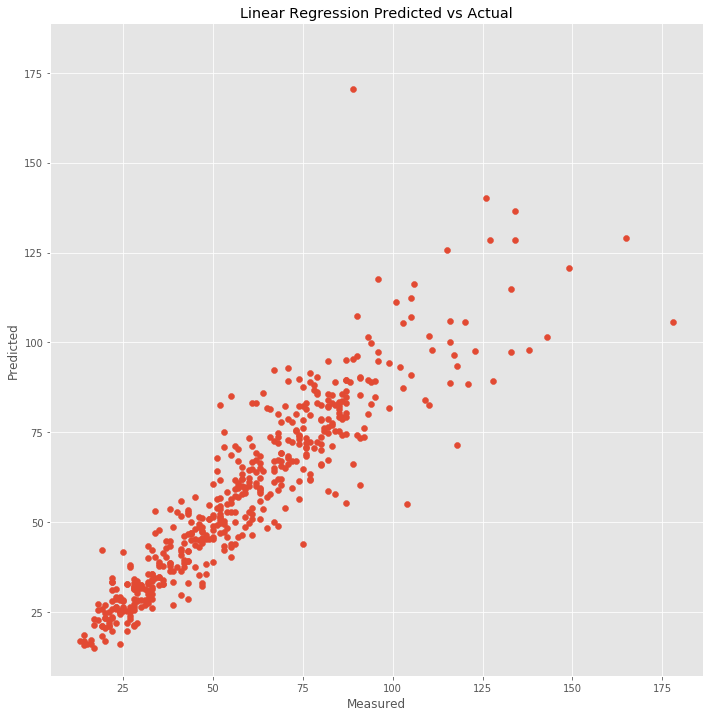

In [88]:
plt.scatter(y_test, lin_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

## Neural Network Regression

In [89]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor(hidden_layer_sizes = 300, random_state = 1234)

# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [90]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.8358344745866993

In [91]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [92]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 11.30
Mean absolute error: 7.63
R-squared: 0.84


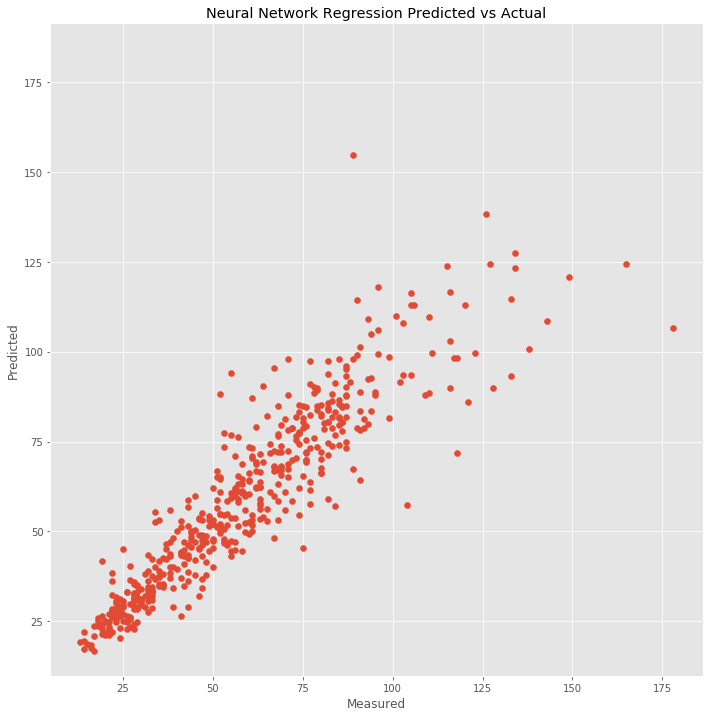

In [93]:
plt.scatter(y_test, nnr_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

## Lasso Regression

In [94]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [95]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.8372039666294876

In [97]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [98]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 11.25


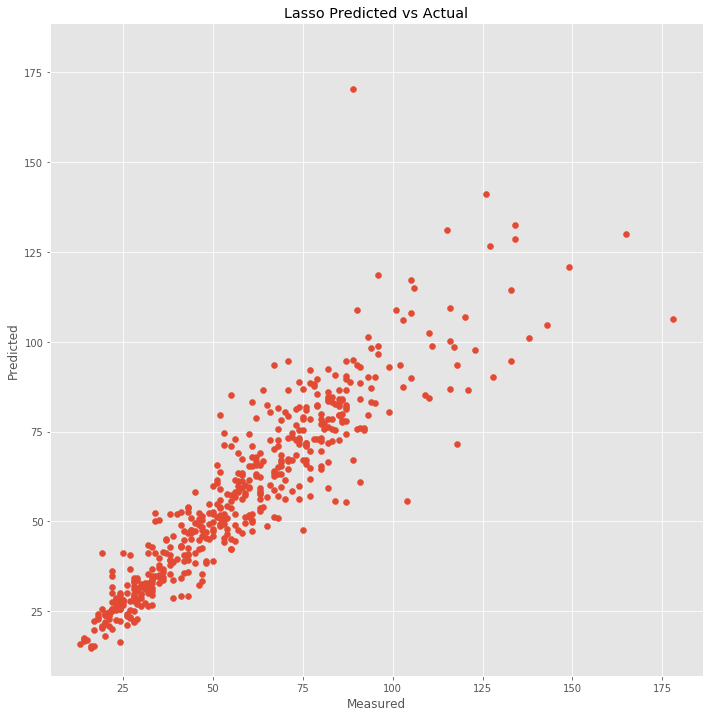

In [99]:
plt.scatter(y_test, lasso_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

## ElasticNet Regression

In [100]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [101]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.8372937239906962

In [103]:
elasticnet_pred = elasticnet.predict(X_test)

In [104]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 11.25


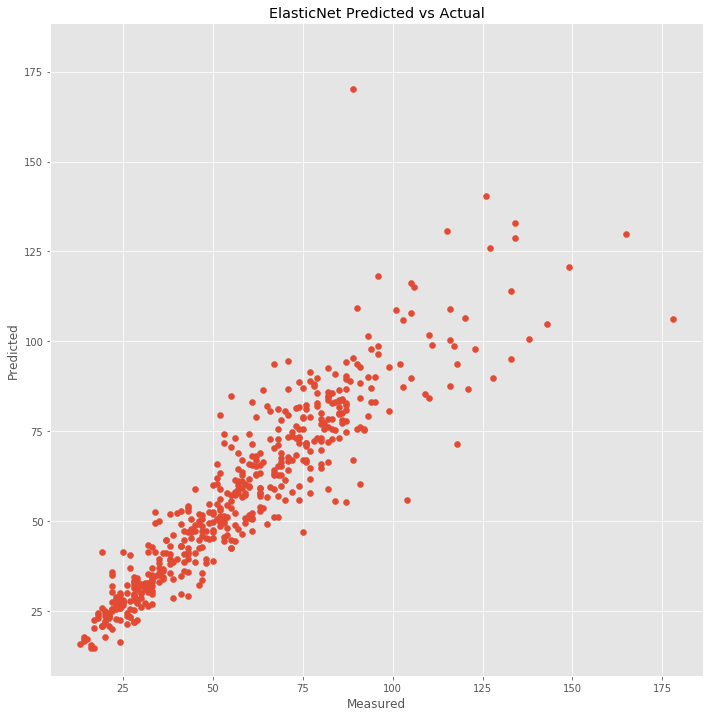

In [105]:
plt.scatter(y_test, elasticnet_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('ElasticNet Predicted vs Actual')
plt.show()

## Random Forest Regression

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=300, random_state=1)

In [107]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [108]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.8384476811049071

In [109]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [110]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 11.21
Mean absolute error: 7.56
R-squared: 0.84


In [111]:
X.columns

Index(['Temp', 'Humidity', 'Pressure', 'day_week_cat', 'PM25_1', 'Temp_1',
       'Pressure_1', 'Humidity_1', 'PM25_2', 'Temp_2', 'Pressure_2',
       'Humidity_2', 'PM25_3', 'Temp_3', 'Pressure_3', 'Humidity_3',
       'month_sin', 'month_cos'],
      dtype='object')

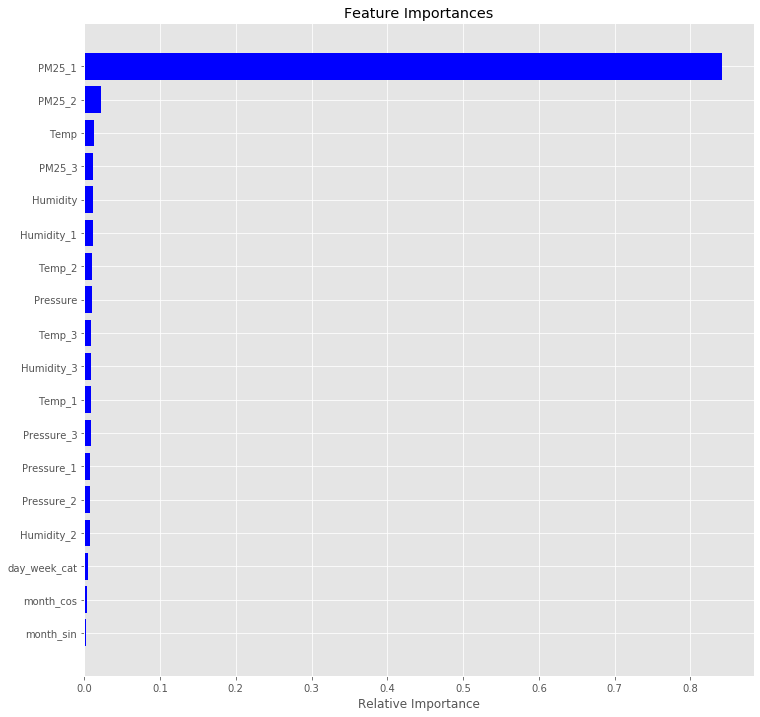

In [112]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

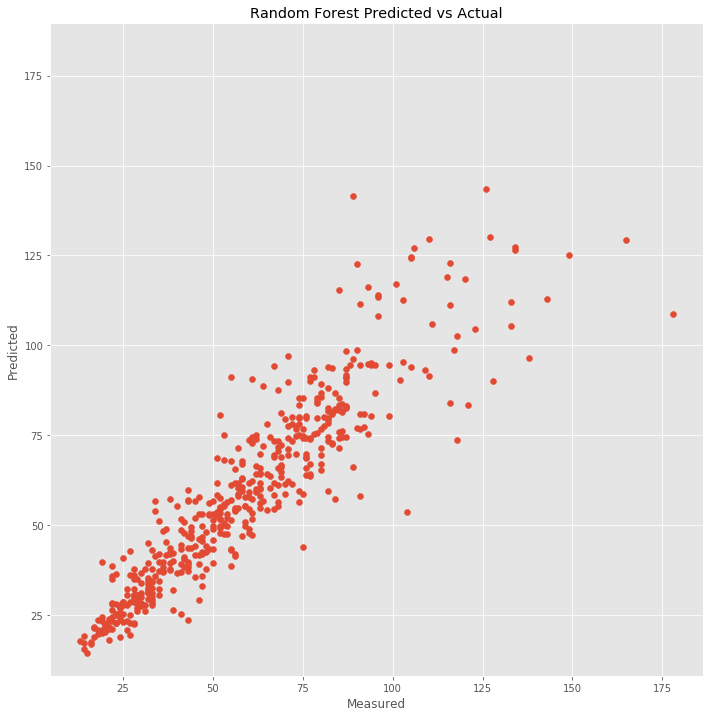

In [113]:
plt.scatter(y_test, regr_rf_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Predicted vs Actual')
plt.show()

## Extra Trees Regression

In [114]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

extra_tree = ExtraTreesRegressor(n_estimators=85, random_state=12345678)

In [115]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=85, n_jobs=None, oob_score=False,
                    random_state=12345678, verbose=0, warm_start=False)

In [116]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.843109988639784

In [117]:
extratree_pred = extra_tree.predict(X_test)

In [118]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 11.05


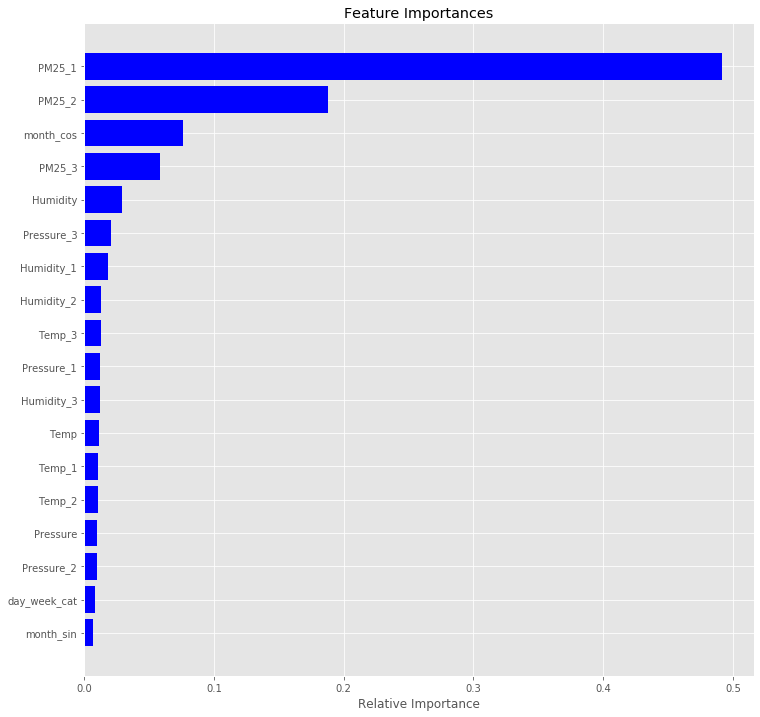

In [119]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

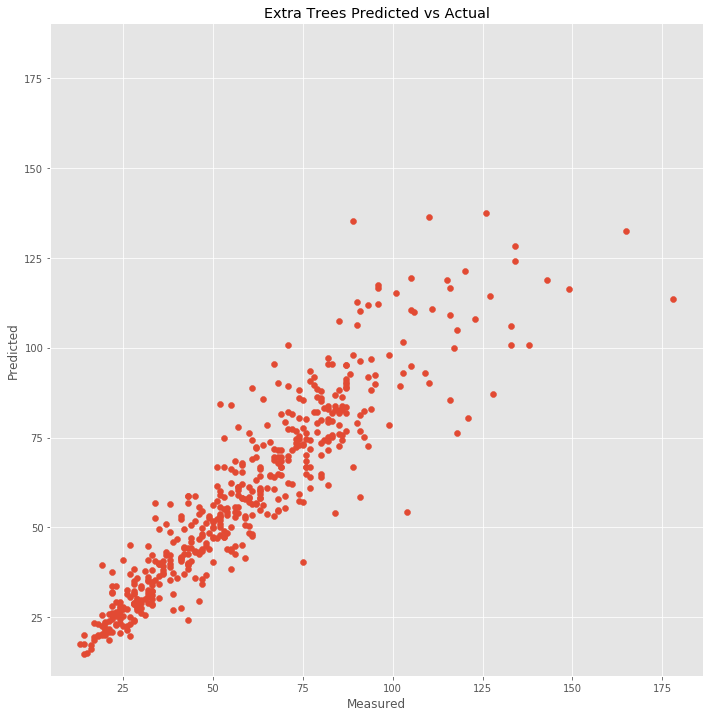

In [120]:
plt.scatter(y_test, extratree_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

## Decision Tree + AdaBoost

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=100, learning_rate=.1)

In [122]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [123]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.7043080749778488

In [124]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.8253529319275741

In [125]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [126]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Coefficients: 
 [ 0.53075672 -0.08859454  0.41754452  0.09796844  1.12935822  1.02753734
  0.10285923 -0.01597224 -0.51718545 -1.80030743  0.31105292 -0.1146499
  0.21648589  0.37371546 -0.67645252  0.17767438 -0.27924021  3.26803204]
Root mean squared error: 11.66
Mean absolute error: 7.70
R-squared: 0.83


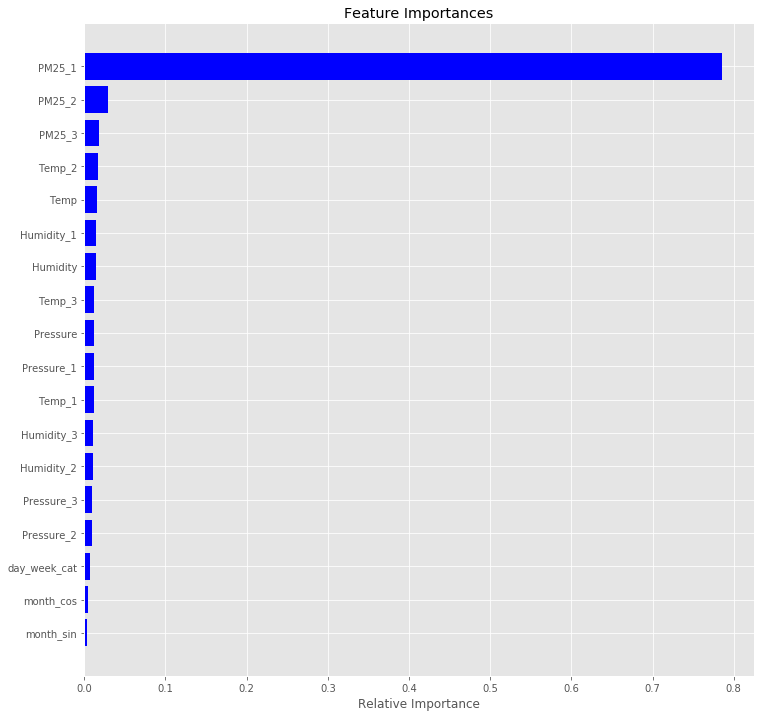

In [127]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

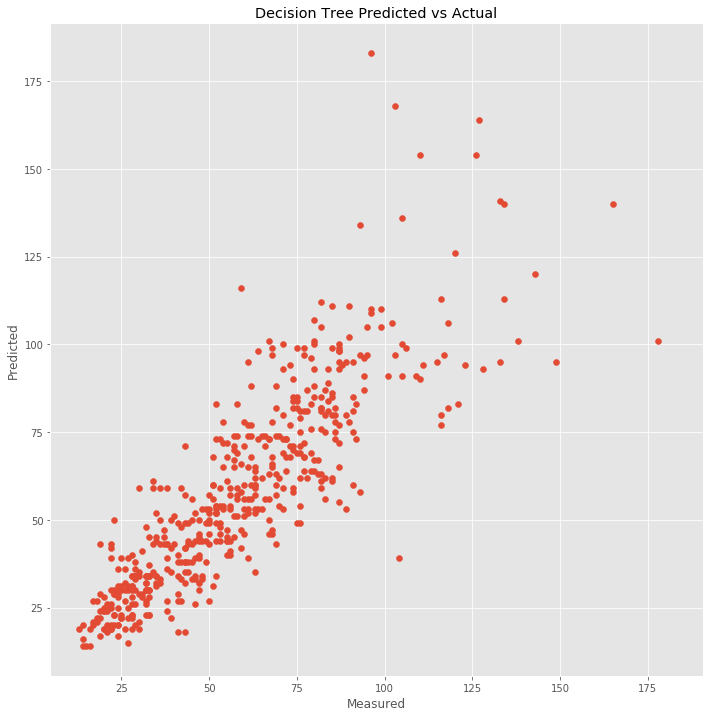

In [128]:
plt.scatter(y_test, tree_1_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

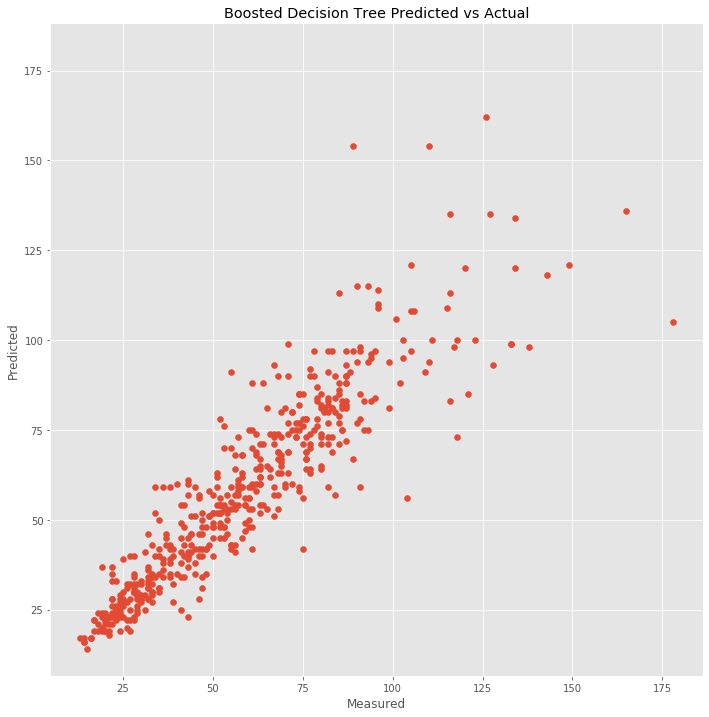

In [129]:
plt.scatter(y_test, tree_2_pred)
plt.axis('square')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

In [130]:
# ##XGBoost

In [131]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [132]:
# from xgboost.sklearn import XGBRegressor

# #Fitting XGB regressor 
# xboost = XGBRegressor(n_estimators=40)

In [133]:
# xboost.fit(X_train, y_train)

In [134]:
# xgb_score = xboost.score(X_test, y_test)
# xgb_score

In [135]:
# #Predict 
# xboost_pred = xboost.predict(X_test)

In [136]:
# print("Root mean squared error: %.2f"
#       % sqrt(mean_squared_error(y_test, xboost_pred)))

In [137]:
# plt.scatter(y_test, xboost_pred)
# plt.axis('square')
# plt.xlabel('Measured')
# plt.ylabel('Predicted')
# plt.title('XGBoost Predicted vs Actual')
# plt.show()

# Evaluation of Models

In [138]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Random Forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
# print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Random Forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# print("XGBoost RMSE: %.2f"
#       % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.8340302108809048
Neural network regression score:  0.8358344745866993
Lasso regression score:  0.8372039666294876
ElasticNet regression score:  0.8372937239906962
Random Forest score:  0.8384476811049071
Extra Trees score:  0.843109988639784
Boosted decision tree score:  0.8253529319275741


RMSE:
Linear regression RMSE: 11.36
Neural network RMSE: 11.30
Lasso RMSE: 11.25
ElasticNet RMSE: 11.25
Random Forest RMSE: 11.21
Extra Trees RMSE: 11.05
Boosted decision tree RMSE: 11.66


In [139]:
df.tail()

,PM25,Temp,Humidity,Pressure,day_week_cat,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3,month_sin,month_cos
Date_UTC,,,,,,,,,,,,,,,,,,,
2020-04-12,58.0,30.998750,26.125000,1011.166667,3,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,1.000000,6.123234e-17
2020-04-13,56.0,31.213333,29.916667,1009.916667,1,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,1.000000,6.123234e-17
2020-04-14,59.0,31.462917,26.875000,1010.125000,5,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,1.000000,6.123234e-17
2020-05-18,45.0,33.800000,31.000000,1003.000000,1,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,0.866025,-5.000000e-01
2020-05-19,0.0,29.581250,59.750000,1007.875000,5,45.0,33.800000,1003.000000,31.000000,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,0.866025,-5.000000e-01


# Prediction of next day values

In [140]:
dfX = df.drop(['PM25'], axis =1)

In [141]:
dfX = dfX.iloc[-1]
dfX

Temp              29.581250
Humidity          59.750000
Pressure        1007.875000
day_week_cat       5.000000
PM25_1            45.000000
Temp_1            33.800000
Pressure_1      1003.000000
Humidity_1        31.000000
PM25_2            59.000000
Temp_2            31.462917
Pressure_2      1010.125000
Humidity_2        26.875000
PM25_3            56.000000
Temp_3            31.213333
Pressure_3      1009.916667
Humidity_3        29.916667
month_sin          0.866025
month_cos         -0.500000
Name: 2020-05-19 00:00:00, dtype: float64

In [142]:
prediction_lin = regr.predict([dfX])
prediction_nr = mlp.predict([dfX])
prediction_lasso = lasso.predict([dfX])
prediction_elastic = elasticnet.predict([dfX])
prediction_rf = regr_rf.predict([dfX])
prediction_extra_tree = extra_tree.predict([dfX])
prediction_adaboost = tree_2.predict([dfX])
# prediction_xboost = xboost.predict([dfX])

In [143]:
print ('Linear Regression: %.3f' % prediction_lin)
print ('Neural Regression: %.3f' %prediction_nr)
print ('Lasso Regression: %.3f' %prediction_lasso)
print ('ElasticNet Regression: %.3f' %prediction_elastic)
print ('Random Forest Regression: %.3f' %prediction_rf)
print ('Extra Trees Regression: %.3f' %prediction_extra_tree)
print ('AdaBoost Regression: %.3f' %prediction_adaboost)
# print ('XGBoost Regreesion: ',prediction_xboost

Linear Regression: 39.926
Neural Regression: 41.015
Lasso Regression: 39.241
ElasticNet Regression: 38.411
Random Forest Regression: 46.600
Extra Trees Regression: 46.247
AdaBoost Regression: 48.000


In [144]:
df.tail()

,PM25,Temp,Humidity,Pressure,day_week_cat,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3,month_sin,month_cos
Date_UTC,,,,,,,,,,,,,,,,,,,
2020-04-12,58.0,30.998750,26.125000,1011.166667,3,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,1.000000,6.123234e-17
2020-04-13,56.0,31.213333,29.916667,1009.916667,1,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,1.000000,6.123234e-17
2020-04-14,59.0,31.462917,26.875000,1010.125000,5,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,1.000000,6.123234e-17
2020-05-18,45.0,33.800000,31.000000,1003.000000,1,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,0.866025,-5.000000e-01
2020-05-19,0.0,29.581250,59.750000,1007.875000,5,45.0,33.800000,1003.000000,31.000000,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,0.866025,-5.000000e-01


# Preparing CSV files for execution on the next day

In [145]:
dfDel = pd.read_csv(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/datasetRawAdded2.csv", index_col="Date_UTC")

In [146]:
dfDel = dfDel[:-1]
dfDel.tail()

,Unnamed: 0,entry_id,PM1,PM25,PM10,CO,Temp,Humidity,Pressure,MAXT,MINT,SPD,WDG,CLD
Date_UTC,,,,,,,,,,,,,,
11/04/20,1737,1737.0,NaN,60.0,58.0,43.00,31.407917,25.083333,1012.166667,31.75,30.67,2.70,197.46,12.25
12/04/20,1738,1738.0,NaN,58.0,55.0,43.00,30.998750,26.125000,1011.166667,31.48,29.94,3.65,177.96,11.63
13/04/20,1739,1739.0,NaN,56.0,58.0,42.00,31.213333,29.916667,1009.916667,31.86,30.03,3.20,182.71,20.88
14/04/20,1740,1740.0,NaN,59.0,NaN,NaN,31.462917,26.875000,1010.125000,31.97,30.59,3.80,215.54,9.88
18/05/20,1741,1741.0,27.0,45.0,45.0,214.99,33.800000,31.000000,1003.000000,NaN,NaN,NaN,NaN,NaN


In [147]:
dfDel.to_csv(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/datasetRawAdded2.csv")

In [148]:
dfDel2 = pd.read_csv(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/clairityCleanedAdded2.csv", index_col="Date_UTC")

In [149]:
dfDel2 = dfDel2[:-1]
dfDel2.tail()

,PM25,Temp,Humidity,Pressure,day_week_cat,PM25_1,Temp_1,Pressure_1,Humidity_1,PM25_2,Temp_2,Pressure_2,Humidity_2,PM25_3,Temp_3,Pressure_3,Humidity_3,month_sin,month_cos
Date_UTC,,,,,,,,,,,,,,,,,,,
2020-04-11,60.0,31.407917,25.083333,1012.166667,2,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,44.0,27.388333,1012.333333,29.666667,1.000000,6.123234e-17
2020-04-12,58.0,30.998750,26.125000,1011.166667,3,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,57.0,28.472083,1011.250000,32.291667,1.000000,6.123234e-17
2020-04-13,56.0,31.213333,29.916667,1009.916667,1,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,57.0,30.697917,1011.291667,27.125000,1.000000,6.123234e-17
2020-04-14,59.0,31.462917,26.875000,1010.125000,5,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,60.0,31.407917,1012.166667,25.083333,1.000000,6.123234e-17
2020-05-18,45.0,33.800000,31.000000,1003.000000,1,59.0,31.462917,1010.125000,26.875000,56.0,31.213333,1009.916667,29.916667,58.0,30.998750,1011.166667,26.125000,0.866025,-5.000000e-01


In [150]:
dfDel2.to_csv(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/clairityCleanedAdded2.csv")

# Creating a JSON file to send the predicted value 

In [151]:
str(float(prediction_extra_tree))

'46.247058823529414'

In [152]:
my_string = "{\"predictionPM25\" : "+ "\"" +str(float(prediction_extra_tree)) +"\"}"

In [153]:
my_string

'{"predictionPM25" : "46.247058823529414"}'

In [154]:
text_file = open(r"/Users/dhruv/Downloads/BE_PROJECT_CSV/PyScript/sampleJSON.json", "wt")
n = text_file.write(my_string)
text_file.close()

In [155]:
# pip freeze